In [1]:
import pandas as pd
import numpy as np
import gc
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

tr = pd.read_pickle('data/Transactions.pkl')
cs = pd.read_pickle('data/Customers.pkl')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
tr.head()

,datetime,custid,store,product,brand,corner,import,amount,installment
0,2000-10-17 18:33:00,16,천호점,4100110001100,비비안스타킹,섬유,0,25000,1
1,2001-01-09 17:43:00,16,신촌점,2139143008000,비오뗌,화장품,0,30000,1
2,2001-01-08 18:50:00,16,천호점,4218410011030,예스비,영캐주얼,0,131000,6
3,2001-03-21 19:13:00,16,천호점,4209563011000,SJ,영캐주얼,0,330000,5
4,2001-04-10 12:00:00,16,천호점,4242470011010,올리브,영캐주얼,0,214200,3


In [5]:
cs.head()

,custid,gender,birth,house_type1,house_type2,hobby,marriage
0,16,2,1980-12-07 00:00:00,N,7,17,0.0
1,29,2,1980-10-07 00:00:00,A,3,6,0.0
2,33,2,1980-09-25 00:00:00,N,3,17,0.0
3,34,2,1980-09-19 00:00:00,A,3,17,0.0
4,50,2,1980-04-23 00:00:00,Z,3,17,0.0


In [6]:
le = LabelEncoder()
result_tr_store = le.fit_transform(tr['store'])
tr['store_encoded'] = result_tr_store

In [7]:
tr['date'] = pd.to_datetime(tr.datetime).dt.date
tr.head()

,datetime,custid,store,product,brand,corner,import,amount,installment,store_encoded,date
0,2000-10-17 18:33:00,16,천호점,4100110001100,비비안스타킹,섬유,0,25000,1,3,2000-10-17
1,2001-01-09 17:43:00,16,신촌점,2139143008000,비오뗌,화장품,0,30000,1,2,2001-01-09
2,2001-01-08 18:50:00,16,천호점,4218410011030,예스비,영캐주얼,0,131000,6,3,2001-01-08
3,2001-03-21 19:13:00,16,천호점,4209563011000,SJ,영캐주얼,0,330000,5,3,2001-03-21
4,2001-04-10 12:00:00,16,천호점,4242470011010,올리브,영캐주얼,0,214200,3,3,2001-04-10


In [8]:
cs['year'] = pd.to_datetime(cs.birth).dt.year
cs['age'] = 2002 - cs['year']
cs.head()

,custid,gender,birth,house_type1,house_type2,hobby,marriage,year,age
0,16,2,1980-12-07 00:00:00,N,7,17,0.0,1980,22
1,29,2,1980-10-07 00:00:00,A,3,6,0.0,1980,22
2,33,2,1980-09-25 00:00:00,N,3,17,0.0,1980,22
3,34,2,1980-09-19 00:00:00,A,3,17,0.0,1980,22
4,50,2,1980-04-23 00:00:00,Z,3,17,0.0,1980,22


In [9]:
tr.store.value_counts()

신촌점    239485
본점     215645
무역점    215583
천호점    205319
Name: store, dtype: int64

### 전체 거래의 거래금액을 살펴봅시다
- min값이 음수인 것을 보아, 환불거래가 섞여있음
- 평균 9만5천원이지만, 표준편차가 32만원으로 분포가 상당히 넓을 것으로 예상됨

In [10]:
tr_plus = tr[tr['amount'] > 0]
tr_minus = tr[tr['amount'] < 0]
print(tr_plus.shape)
print(tr_minus.shape)  # 약 6퍼센트가 환불거래입니다.

# 이상치 제거를위해서 환불거래는 제외한 tr_plus 프레임을 사용하도록 하겠습니다.

(816044, 11)
(59988, 11)


In [11]:
df_merge = pd.merge(tr_plus, cs[['custid', 'age']], on = 'custid')
df = pd.DataFrame(pd.pivot_table(df_merge, index = ['custid'], columns =['store'], values=['amount'], aggfunc= ['sum','mean','count'] )).reset_index().fillna(0)
df.columns = ['custid', '무역점_sum','본점_sum','신촌점_sum','천호점_sum',
              '무역점_mean','본점_mean','신촌점_mean','천호점_mean',
              '무역점_count','본점_count','신촌점_count','천호점_count']
df = pd.merge(df, cs[['custid','age']])
df

,custid,무역점_sum,본점_sum,신촌점_sum,천호점_sum,무역점_mean,본점_mean,신촌점_mean,천호점_mean,무역점_count,본점_count,신촌점_count,천호점_count,age
0,16,0.0,0.0,404034.0,3499100.0,0.000000,0.000000,67339.0,145795.833333,0.0,0.0,6.0,24.0,22
1,29,0.0,0.0,0.0,1183830.0,0.000000,0.000000,0.0,73989.375000,0.0,0.0,0.0,16.0,22
2,33,2671322.0,317800.0,0.0,2090447.0,106852.880000,105933.333333,0.0,74658.821429,25.0,3.0,0.0,28.0,22
3,34,672150.0,1225800.0,0.0,149000.0,96021.428571,111436.363636,0.0,49666.666667,7.0,11.0,0.0,3.0,22
4,50,0.0,0.0,3580200.0,0.0,0.000000,0.000000,99450.0,0.000000,0.0,0.0,36.0,0.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18336,49985,197621.0,5767153.0,0.0,0.0,19762.100000,108814.207547,0.0,0.000000,10.0,53.0,0.0,0.0,84
18337,49992,1420000.0,553500.0,0.0,0.0,236666.666667,69187.500000,0.0,0.000000,6.0,8.0,0.0,0.0,86
18338,49994,1200000.0,17103700.0,0.0,0.0,92307.692308,231131.081081,0.0,0.000000,13.0,74.0,0.0,0.0,88
18339,49997,0.0,9196120.0,0.0,0.0,0.000000,213863.255814,0.0,0.000000,0.0,43.0,0.0,0.0,91


In [12]:
four_mean = df.describe().astype(int).iloc[1:,5:9]
four_mean.columns = ['무역점','본점','신촌점','천호점']
four_mean

,무역점,본점,신촌점,천호점
mean,70969,74181,41330,34255
std,145826,169788,121985,81538
min,0,0,0,0
25%,0,0,0,0
50%,26901,0,0,0
75%,101162,101842,65274,52454
max,5950000,6500000,10970000,3513000


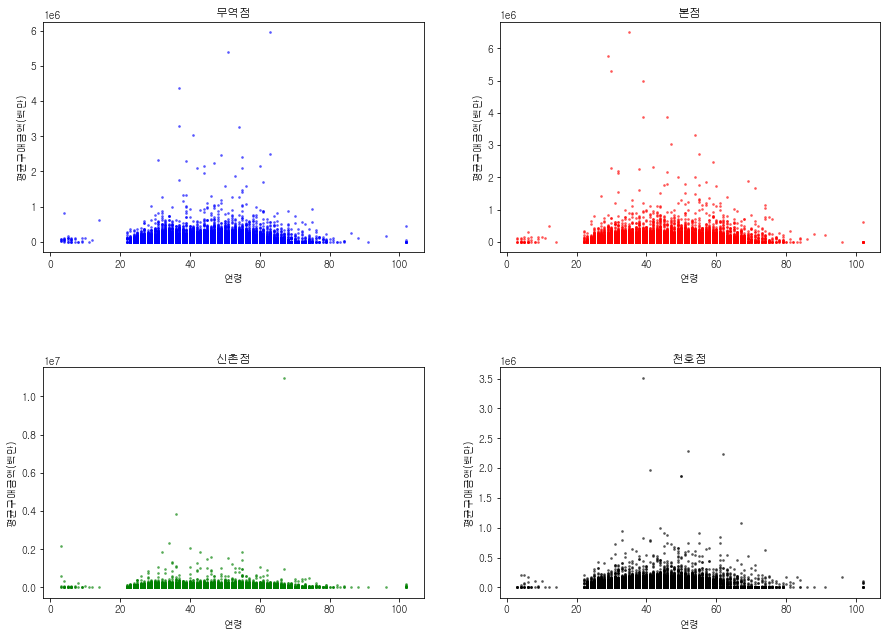

In [13]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.subplot(221)
plt.scatter(df['age'], df['무역점_mean'],  s=3, alpha = 0.5, color='blue')
plt.title('무역점')
plt.xlabel('연령')
plt.ylabel('평균구매금액(백만)')

plt.subplot(222)
plt.scatter(df['age'], df['본점_mean'], s=3, alpha = 0.5, color='red')
plt.title('본점')
plt.xlabel('연령')
plt.ylabel('평균구매금액(백만)')

plt.subplot(223)
plt.scatter(df['age'], df['신촌점_mean'],s=3, alpha = 0.5, color='green')
plt.title('신촌점')
plt.xlabel('연령')
plt.ylabel('평균구매금액(백만)')

plt.subplot(224)
plt.scatter(df['age'], df['천호점_mean'], s=3, alpha = 0.5, color='black') 
plt.title('천호점')
plt.xlabel('연령')
plt.ylabel('평균구매금액(백만)')

plt.show()

### 단골마케팅의 중요성 : 고객별 점포 치중도 계산해보기
고객별 점포지중도 = max(점포별방문횟수) / sum(점포별 방문횟수)

In [14]:
df['shop_skew'] = 0
for i in range(len(df)) : 
    df.loc[i,'shop_skew'] = float(np.max(df.iloc[i,-6:-2]) /  np.sum(df.iloc[i,-6:-2]))

In [15]:
# 50%이상의 고객은 97%이상의 빈도로 같은 점포를 방문함
# 이는 고객들이 대부분 한가지 매장에서 꾸준하게 방문하는 것을 의미함
df.describe().shop_skew

count    18341.000000
mean         0.897406
std          0.147923
min          0.272727
25%          0.835294
50%          0.979592
75%          1.000000
max          1.000000
Name: shop_skew, dtype: float64

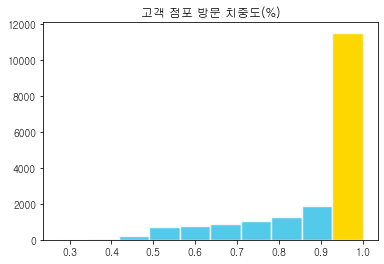

In [16]:
n, bins, patches  = plt.hist(df['shop_skew'],
         color = '#54CAEA' # 바 색 변경
         ,edgecolor = 'whitesmoke' # 선으로 구분
         ,linewidth = 1.4 # 선 굵기 설정
         )
patches[9].set_facecolor('gold')
plt.title('고객 점포 방문 치중도(%)')
plt.show()

In [17]:
df[df['shop_skew'] > 0.9].shape

(12329, 15)

### VIP의 중요성
-

In [193]:
# 점포별 고객별 구매금액의 백분위를 계산하는 함수
def percentile_rank(df_name,col) :
    df01 = df_name[['custid',col]]
    print((df01.shape))
    drop_index01 = df01[df01[col] == 0].index
    print(len(drop_index01))
    df01.drop(index=drop_index01, inplace=True)
    print((df01.shape))
    df01['percentile_rank'] = df01[col].rank(pct = True)
    df01.sort_values(by='percentile_rank', ascending=False, inplace=True)
    df01['top10'] = 0
    df01.loc[df01['percentile_rank'] > 0.8,'top10'] = 1
    df01.reset_index(drop=True,inplace=True)
    
    df02 = pd.DataFrame(df01.groupby('top10')[col].sum()).reset_index()
    return df02

In [194]:
df_무역_rank = percentile_rank(df,'무역점_sum')
df_신촌_rank = percentile_rank(df,'신촌점_sum')
df_본점_rank = percentile_rank(df,'본점_sum')
df_천호_rank = percentile_rank(df,'천호점_sum')



(18341, 2)
8675
(9666, 2)
(18341, 2)
11323
(7018, 2)
(18341, 2)
9659
(8682, 2)
(18341, 2)
12731
(5610, 2)


In [213]:
df_all = pd.concat([df_무역_rank,df_신촌_rank['신촌점_sum'],df_본점_rank['본점_sum'],df_천호_rank['천호점_sum'] ],axis=1)
df_all = df_all.T
df_all.columns = ['하위90%', '상위10%']
df_all = df_all.drop(index='top10')
df_all.index = ['무역점','신촌점','본점','천호점']
df_all['하위90%비율'] = (df_all['하위90%'] / (df_all['하위90%'] + df_all['상위10%']))
df_all['상위10%비율'] = (df_all['상위10%'] / (df_all['하위90%'] + df_all['상위10%']))

df_all

,하위90%,상위10%,하위90%비율,상위10%비율
무역점,8.668848e+09,1.690373e+10,0.338990,0.661010
신촌점,8.746265e+09,1.316924e+10,0.399090,0.600910
본점,8.968014e+09,2.094351e+10,0.299818,0.700182
천호점,8.252262e+09,1.200053e+10,0.407463,0.592537


(array([0, 1, 2, 3]),
 [Text(0, 0, '무역점'), Text(1, 0, '신촌점'), Text(2, 0, '본점'), Text(3, 0, '천호점')])

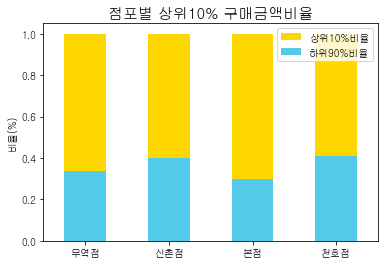

In [242]:
df_all[['하위90%비율','상위10%비율']].plot(kind='bar', stacked=True, legend='reverse', color=['#54CAEA','gold'])   
plt.title('점포별 상위10% 구매금액비율', fontsize=15)
plt.ylabel('비율(%)')
plt.xticks(rotation=0)